In [1]:
from environment import Environment
from agent import Agent
from main import GCFModel
import measurement
import numpy as np

\\csce.datastore.ed.ac.uk\csce\eng\users\s2013568\Win7\Desktop\DEM\DEM_test-1\Ageng_based_simulation\Force_based_model\main.py:100: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  agent_circles = [patches.Ellipse(agent.position, 2*agent.a, 2*agent.b,angle=misc.calculate_angle(agent.velocity), color='b', fill=False, edgecolor='b') for agent in self.agents]
\\csce.datastore.ed.ac.uk\csce\eng\users\s2013568\Win7\Desktop\DEM\DEM_test-1\Ageng_based_simulation\Force_based_model\main.py:130: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  new_agent_circles = [patches.Ellipse(agent.position, 2*agent.a, 2*agent.b, angle=misc.calculate_angle(agent.velocity), color='b', fill=False, edgecolor='b') for agent in self.agents]


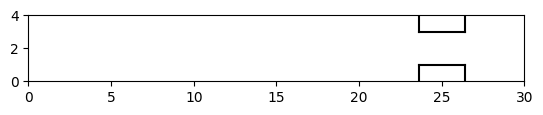

In [2]:
# Function to calculate flow rate
def calculate_flow_rate(step_of_passing):
    return (60 - 1) / step_of_passing

# Define range for bottleneck_height    
bottleneck_heights = [2.0]

# Initialize lists to store results
flow_rates = []

# Run simulation for each bottleneck height
for bottleneck_height in bottleneck_heights:
    # Define environment
    env = Environment(width=30, height=4, bottleneck_width=2.8, bottleneck_height=bottleneck_height, location=(10, 0), periodic=False)
    
    # Initialize agents with 5 agents starting extremely close to each other
    agents = []
    num_agents = 2  # Set number of agents to 5

    # Define a starting position close to each other
    start_x = 5.0  # Arbitrary central starting point near the middle of the box
    start_y = 2.0
    agent_spacing = 1.0  # Very small spacing between agents

    # Place 5 agents close together
    # for i in range(num_agents):
    #     # Adjust x positions slightly for proximity
    #     x_pos = start_x + agent_spacing * i
    #     y_pos = start_y

        # agents.append(agent)
    agents = [Agent(position=[19, 0.5], velocity=[0.0, 0.0], a_min=0.18, b_min=0.2, tau=0.53, f=1.25, desired_walking_speed=1.34, test=False)
              
    ]
    # Initialize GCF model
    gcf_model = GCFModel(environment=env, agents=agents, time_constant=0.5, eta=0.2)
    
    # Optionally, animate the system
    gcf_model.animate(steps=1000, dt=0.01, interval=50000, output_filename="crowd_simulation_close_agents.gif", show_forces=True)
    
    # Run the simulation
    #gcf_model.run_simulation(steps=10, dt=0.01, log_interval=10, verbose=False)

    # Calculate flow rate and record it
    # step_of_passing = gcf_model.recorded_step_of_passing[0]
    # flow_rate = calculate_flow_rate(step_of_passing)
    # flow_rates.append(flow_rate)


In [ ]:
# Function to calculate flow rate
def calculate_flow_rate(step_of_passing):
    return (60 - 1) / step_of_passing

# Define range for bottleneck_height    
bottleneck_heights = np.arange(0.5, 2.6, 0.1)
# bottleneck_heights = [1.1]

# Initialize lists to store results
flow_rates = []

# Run simulation for each bottleneck height
for bottleneck_height in bottleneck_heights:
    print(bottleneck_height)
    # Define environment
    env = Environment(width=30, height=4, bottleneck_width=2.8, bottleneck_height=bottleneck_height, location=(10, 0), periodic=False)
    
    # Initialize agents
    agents = []
    num_agents = 100  # Set the number of agents dynamically based on your needs

    # Define available space for agents
    start_x = 19.1  # Right boundary
    end_x = 0.5     # Left boundary
    start_y = 0.5   # Bottom boundary
    end_y = 3.5     # Top boundary
    available_width = start_x - end_x
    available_height = end_y - start_y
    available_area = available_width * available_height

    # Dynamically calculate the number of rows and columns
    aspect_ratio = available_width / available_height
    num_columns = int(np.sqrt(num_agents * aspect_ratio))  # Columns based on aspect ratio
    num_rows = int(num_agents / num_columns)

    # Calculate spacing dynamically based on available space and number of agents
    spacing_x = available_width / num_columns
    spacing_y = available_height / num_rows

    # Generate grid of agent positions
    x_positions = np.linspace(start_x, end_x, num_columns)
    y_positions = np.linspace(start_y, end_y, num_rows)

    # Place agents uniformly in both x and y directions
    for y in y_positions:
        for x in x_positions:
            if len(agents) >= num_agents:
                break
            agent = Agent(position=[x, y], velocity=[0.0, 0.0], a_min=0.18, b_min=0.1, tau=0.53, f=1.25, desired_walking_speed=1.34, test=False)
            agents.append(agent)
        if len(agents) >= num_agents:
            break
        
    gcf_model = GCFModel(environment=env, agents=agents, time_constant=0.5, eta=0.2)
    # gcf_model.animate(steps=400, dt=0.01, interval=1000000000, output_filename="test.gif", show_forces=True)
    gcf_model.run_simulation(steps=10000, dt=0.01, log_interval=100, verbose=True)

    
    # Calculate flow rate and record it
    if gcf_model.recorded_step_of_passing != []:
        step_of_passing = gcf_model.recorded_step_of_passing[0]
        flow_rate = calculate_flow_rate(step_of_passing)
        flow_rates.append(flow_rate)
    else:
        flow_rates.append(0)